## KUIS 1 MACHINE LEARNING - TI 3E
### NAMA    : Hanif Aji Prasetyo
### NIM     : 2141720090
### ABSEN   : 17



# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784')

In [ ]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
# print(mnist.DESCR)

In [ ]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
# mnist.keys()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [3]:
# Load dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# 1. Cek data imbalance
label_counts = np.bincount(y)
for i in range(10):
  print(f"Label {i}: {label_counts[i]} samples")

Label 0: 6903 samples
Label 1: 7877 samples
Label 2: 6990 samples
Label 3: 7141 samples
Label 4: 6824 samples
Label 5: 6313 samples
Label 6: 6876 samples
Label 7: 7293 samples
Label 8: 6825 samples
Label 9: 6958 samples


##### Tidak ada data imbalance yang signifikan, dibuktikan dengan jumlah samples pada tiap label yang tidak berbeda jauh.

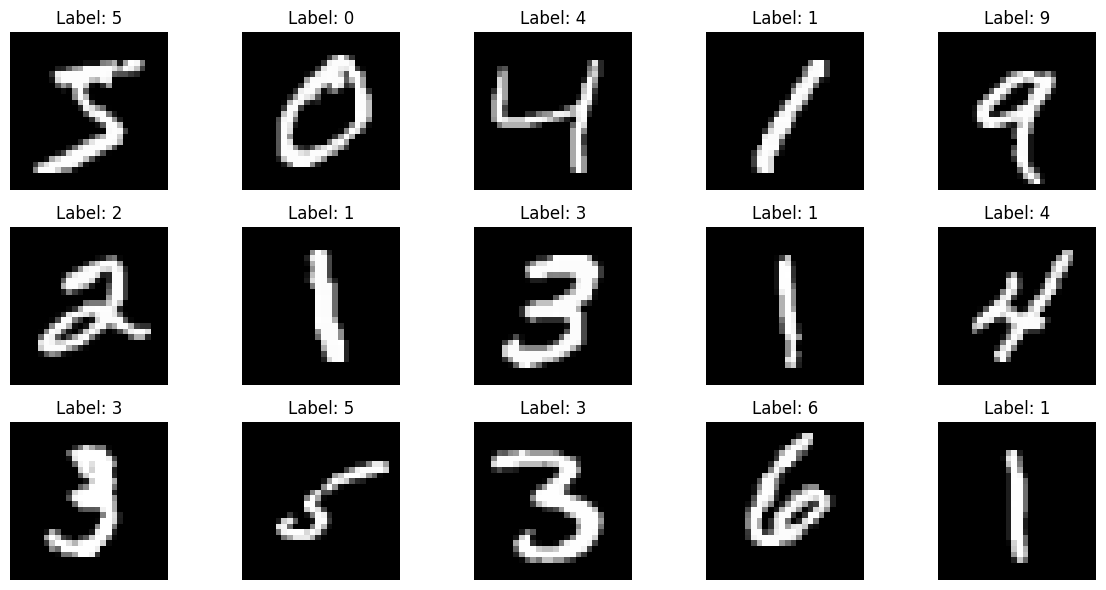

In [5]:
# 2. Tampilkan 15 citra pertama dari dataset MNIST
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# 3. Ekstraksi fitur menggunakan PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [16]:
# 4. Split data menjadi data training dan testing dengan rasio 70:30
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 4. Split data menjadi data training dan testing dengan rasio 80:20
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Split data menjadi data training dan testing dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [17]:
# 5. Klasifikasi dengan Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_train_pred_nb = naive_bayes.predict(X_train)
y_test_pred_nb = naive_bayes.predict(X_test)

# 5. Klasifikasi dengan SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

In [18]:
# 6. Evaluasi model
def evaluate_model(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy ({label}): {accuracy}")
    print(f"Classification Report ({label}):\n{classification_report(y_true, y_pred)}")
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix ({label}):\n{cm}")

evaluate_model(y_train, y_train_pred_nb, "Naive Bayes (Training)")
evaluate_model(y_test, y_test_pred_nb, "Naive Bayes (Testing)")
evaluate_model(y_train, y_train_pred_svm, "SVM (Training)")
evaluate_model(y_test, y_test_pred_svm, "SVM (Testing)")

Accuracy (Naive Bayes (Training)): 0.7277460317460317
Classification Report (Naive Bayes (Training)):
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      6220
           1       0.86      0.93      0.89      7077
           2       0.63      0.58      0.60      6316
           3       0.82      0.59      0.69      6381
           4       0.73      0.83      0.78      6213
           5       0.78      0.64      0.70      5655
           6       0.93      0.72      0.81      6199
           7       0.88      0.47      0.61      6569
           8       0.51      0.80      0.62      6132
           9       0.60      0.76      0.67      6238

    accuracy                           0.73     63000
   macro avg       0.75      0.73      0.72     63000
weighted avg       0.76      0.73      0.73     63000

Confusion Matrix (Naive Bayes (Training)):
[[5769    0  161   22   25   72   55    3  105    8]
 [   8 6611   50   11   22   39   15   28  

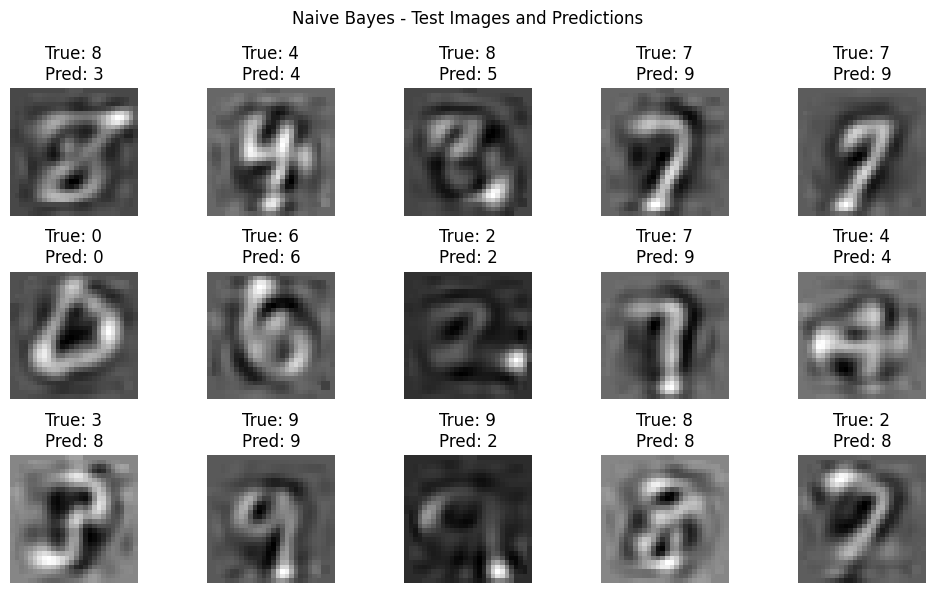

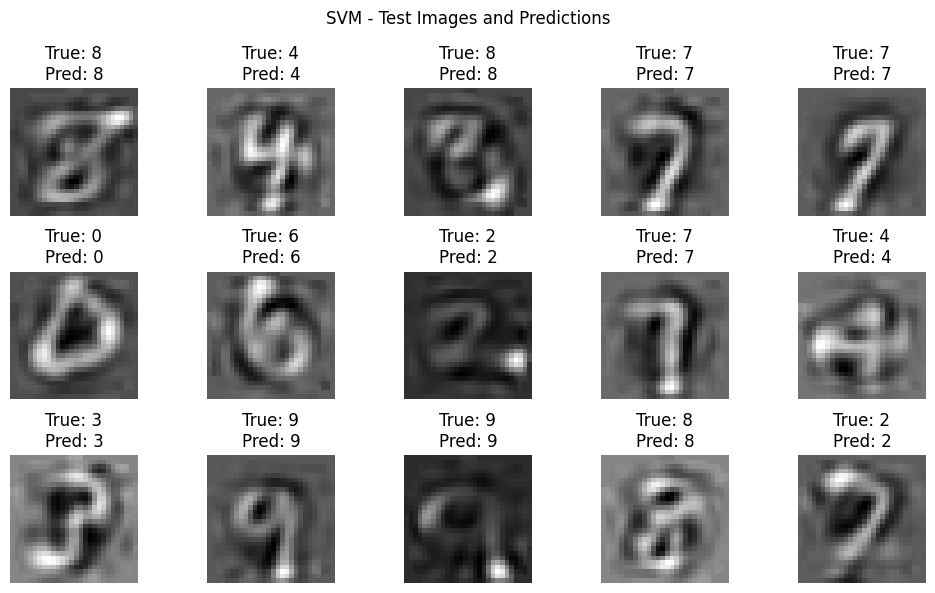

In [19]:
# 7. Tampilkan citra data testing beserta hasil pelabelannya
def show_images_with_predictions(X_test, y_test, y_pred, model_name):
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.suptitle(f"{model_name} - Test Images and Predictions")
    plt.tight_layout()
    plt.show()

# Menggunakan invers PCA untuk mengembalikan data vektor fitur ke dimensi asalnya
X_test_restored = pca.inverse_transform(X_test)

show_images_with_predictions(X_test_restored, y_test, y_test_pred_nb, "Naive Bayes")
show_images_with_predictions(X_test_restored, y_test, y_test_pred_svm, "SVM")

In [20]:
# 8. Model terbaik dan konfigurasinya
# Bandingkan akurasi pada data testing dari kedua model dan pilih yang tertinggi
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

if accuracy_nb > accuracy_svm:
    best_model = "Naive Bayes"
    best_model_config = "Default configuration"
    best_accuracy = accuracy_nb
else:
    best_model = "SVM"
    best_model_config = "Kernel: RBF, C: 1"
    best_accuracy = accuracy_svm

print(f"Model terbaik: {best_model}")
print(f"Konfigurasi: {best_model_config}")
print(f"Tingkat akurasi terbaik: {best_accuracy}")

Model terbaik: SVM
Konfigurasi: Kernel: RBF, C: 1
Tingkat akurasi terbaik: 0.97
